<a href="https://colab.research.google.com/github/emilydaviess/projects/blob/master/01_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms

In [ ]:
torch.cuda.is_available() # check if cuda is available, if false (default), we'll swicth over to GPU

False

In [ ]:
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [ ]:
transform = transforms.ToTensor()
batch_size=8

trainset = torchvision.datasets.FashionMNIST(
    root="./data",
    train=True,
    download=True,
    transform=transform
)
testset = torchvision.datasets.FashionMNIST(
    root="./data",
    train=False,
    download=True,
    transform=transform
)

classes = (
    "T-shirt/top", "Trousers/pants", "Pullover shirt", "Dress",
    "Coat", "Sandal", "Shirt", "Sneaker", "Bag","Ankle boot"
)

In [ ]:
# lets learn a bit about the Fashion MNIST dataset

train_iter = iter(trainset)
image, label = next(train_iter)
image.shape, label
# we'll see that the shape of the first image is (torch.Size([1, 28, 28]), 9)
# this means the image is of shape 1,28,28 and the claffication is index 9 (ankle boot)




(torch.Size([1, 28, 28]), 9)

In [ ]:
torch.min(image).item(), torch.max(image).item()
# this show the pixels in the image are between 0.0 and 1.0 (min,max)

(0.0, 1.0)

Ankle boot


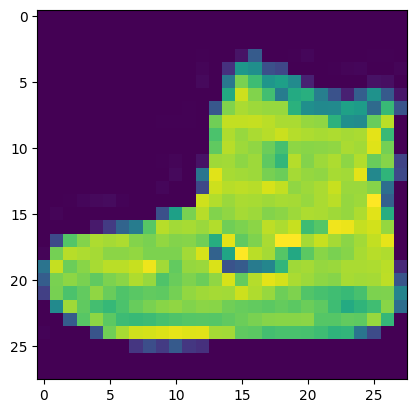

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

np_img = image.numpy() # convert from pytorch tensor to numpy tensor to plot using matplotlib
print(classes[label]) # classes is out list of labels above, using classes[label] i.e. classes[9] will return ankle boot
plt.imshow(np_img.reshape(28,28,1)) # slight reshape as numpy uses this shape



In [ ]:
len(trainset), len(testset)

(60000, 10000)

In [ ]:
# split the trainset into a trainset & validation test
trainset,valset = torch.utils.data.random_split(trainset, [50000,10000])
len(trainset),len(valset),len(testset)

print(f'Number of batches in the training set: {int(50000/batch_size)}')

Number of batches in the training set: 6250


In [ ]:
print(f'Number of batches in the validation set: {int(10000/batch_size)}')

Number of batches in the validation set: 1250


In [ ]:
print(f'Number of batches in the test set: {int(10000/batch_size)}')

Number of batches in the test set: 1250


In [ ]:
type(trainset)

torch.utils.data.dataset.Subset

In [ ]:
# in pytorch we don't iterate over a dataset, we wrap them in a dataLoader first
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=2)
valloader = torch.utils.data.DataLoader(valset, batch_size=batch_size, shuffle=False, num_workers=2) # no need to shuffle as we're just evaluating
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=2)
